## Numpy - Applications in Finance

In [1]:
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
datafile = 'http://people.bu.edu/kalathur/datasets/AAPL2.csv'

In [3]:
# Import closing price and volume from the file (columns 5 and 6)
# First column is column 0

c, v = np.loadtxt(datafile, delimiter=',', skiprows=1, usecols=(5,6), unpack=True)

c = np.round(c, 2)

In [4]:
c[:5]

array([167.24, 168.68, 167.98, 168.59, 168.22])

In [5]:
v[:5]

array([20993400., 22283500., 22490200., 21835700., 24626800.])

In [6]:
# number of values in the dataset

len(c)

252

**Volume Weighted Average Price (VWAP)**

In [7]:
vwap = np.average(c, weights=v)
print("VWAP =", vwap)

VWAP = 225.42521029984195


In [8]:
# Arithmetic mean

print("mean =", np.mean(c))


mean = 223.410873015873


**Value Range**

In [9]:
# Import daily high and low price from the file (columns 2 and 3)

h, l = np.loadtxt(datafile, delimiter=',', skiprows=1, usecols=(2,3), unpack=True)

h = np.round(h, 2)
l = np.round(l, 2)

In [10]:
h[:5]

array([171.21, 171.  , 172.48, 171.26, 171.7 ])

In [11]:
l[:5]

array([169.25, 169.7 , 169.92, 169.38, 169.75])

In [12]:
print("highest daily high =", np.max(h))
print("lowest  daily low =", np.min(l))

highest daily high = 327.85
lowest  daily low = 169.25


In [13]:
# Spread of data

print("Spread high price", np.ptp(h))
print("Spread low price", np.ptp(l))

Spread high price 156.85000000000002
Spread low price 152.13


In [14]:
print("Spread high price", np.max(h) - np.min(h))
print("Spread low price", np.max(l) - np.min(l))

Spread high price 156.85000000000002
Spread low price 152.13


**Statistics**

In [15]:
print("median =", np.median(c))

median = 206.14999999999998


In [16]:
print("variance =", np.var(c))

variance = 1872.2772635235576


In [17]:
print("Standard deviation =", np.std(c))

Standard deviation = 43.269819314662705


**Simple Returns**
 - differences between consecutive values / value of the previous day

In [18]:
returns = np.diff( c ) / c[ : -1]
returns[:5]

array([ 0.00861038, -0.00414987,  0.00363138, -0.00219467,  0.0029723 ])

In [19]:
np.max(returns), np.min(returns)

(0.04907108239095314, -0.05809192343126213)

In [20]:
print("Standard deviation =", np.std(returns))

Standard deviation = 0.01473850574923547


**Log Returns**
 - log of all values and calculate differences between them
 - log(a) - log(b) = log(a/b)
 - measure rate of change
 - input should not have zeros or negative numbers

In [21]:
logreturns = np.diff( np.log(c) )

In [22]:
logreturns[:5]

array([ 0.00857352, -0.0041585 ,  0.00362481, -0.00219709,  0.00296789])

In [23]:
# Alternatively

logreturns = np.log(c[1:]/c[:-1])

logreturns[:5]

array([ 0.00857352, -0.0041585 ,  0.00362481, -0.00219709,  0.00296789])

**Positive Returns**

In [24]:
pos_ret_indices = np.where(returns > 0)
print("Indices with positive returns\n", pos_ret_indices)

Indices with positive returns
 (array([  0,   2,   4,   5,   7,   8,   9,  10,  12,  13,  17,  18,  19,
        20,  21,  22,  23,  25,  26,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  40,  43,  44,  45,  46,  47,  48,  52,  54,  56,  59,
        63,  64,  68,  74,  77,  78,  79,  80,  81,  82,  86,  87,  89,
        93,  96,  97,  98, 101, 102, 104, 105, 108, 110, 111, 114, 115,
       117, 121, 122, 123, 126, 129, 130, 131, 132, 135, 137, 138, 141,
       142, 144, 145, 146, 149, 150, 151, 154, 156, 159, 160, 162, 163,
       164, 166, 167, 168, 172, 173, 174, 176, 177, 178, 179, 182, 183,
       184, 186, 187, 188, 189, 191, 193, 194, 199, 201, 205, 206, 207,
       209, 210, 211, 212, 213, 214, 216, 218, 219, 220, 222, 223, 224,
       226, 228, 229, 230, 231, 234, 235, 237, 238, 241, 242, 246, 247,
       248, 250]),)


In [25]:
np.where(logreturns > 0)

(array([  0,   2,   4,   5,   7,   8,   9,  10,  12,  13,  17,  18,  19,
         20,  21,  22,  23,  25,  26,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  40,  43,  44,  45,  46,  47,  48,  52,  54,  56,  59,
         63,  64,  68,  74,  77,  78,  79,  80,  81,  82,  86,  87,  89,
         93,  96,  97,  98, 101, 102, 104, 105, 108, 110, 111, 114, 115,
        117, 121, 122, 123, 126, 129, 130, 131, 132, 135, 137, 138, 141,
        142, 144, 145, 146, 149, 150, 151, 154, 156, 159, 160, 162, 163,
        164, 166, 167, 168, 172, 173, 174, 176, 177, 178, 179, 182, 183,
        184, 186, 187, 188, 189, 191, 193, 194, 199, 201, 205, 206, 207,
        209, 210, 211, 212, 213, 214, 216, 218, 219, 220, 222, 223, 224,
        226, 228, 229, 230, 231, 234, 235, 237, 238, 241, 242, 246, 247,
        248, 250]),)

**Volatility**
 - measures price variation
 - annualized volatility is equal to the standard deviation of the log returns as a ratio of its mean, divided by one over the square root of the number of business days in a year

In [26]:
annual_volatility = np.std(logreturns)/np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)

print("Annual volatility", annual_volatility)


Annual volatility 89.96452176931065


In [27]:
print("Monthly volatility", annual_volatility * np.sqrt(1./12.))

Monthly volatility 25.970520430513723


**Dealing with Dates**

In [28]:
from datetime import datetime
import calendar

Monday 0, Tuesday 1, Wednesday 2, Thursday 3, Friday 4, Saturday 5, Sunday 6

In [29]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [30]:
def datestr2num(s):
   return datetime.strptime(s, "%Y-%m-%d").date().weekday()

In [31]:
datestr2num('2020-2-10')

0

In [32]:
datestr2num('2020-2-11')

1

In [33]:
# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [34]:
close[:5]

array([167.24, 168.68, 167.98, 168.59, 168.22])

In [35]:
dates[:5]

array([0., 1., 2., 3., 4.])

In [36]:
np.unique(dates)

array([0., 1., 2., 3., 4.])

In [37]:
# averages based on day of week

averages = np.zeros(len(np.unique(dates)))

for i in range(5):
    indices = np.where(dates == i) 
    prices  = np.take(close, indices)
    avg = np.mean(prices)
    avg = np.round(avg)
    print("Day", i, "Average", avg)
    averages[i] = avg

Day 0 Average 224.0
Day 1 Average 222.0
Day 2 Average 221.0
Day 3 Average 224.0
Day 4 Average 225.0


In [38]:
top = np.max(averages)
print("Highest average:", top)
print("Top day of the week index:", np.argmax(averages))
print("Top day of the week is", calendar.day_name[np.argmax(averages)])
print()

bottom = np.min(averages)
print("Lowest average:", bottom)
print("Bottom day of the week index:", np.argmin(averages))
print("Bottom day of the week is", calendar.day_name[np.argmin(averages)])

Highest average: 225.0
Top day of the week index: 4
Top day of the week is Friday

Lowest average: 221.0
Bottom day of the week index: 2
Bottom day of the week is Wednesday


## Average True Range (ATR)
 - provides degree of price volatility
 - N-period smoothed moving average of the true range values
 - Recommended 14 period smoothing
 - Range of a day : $ (high-low) $
 - True Range TR = $ max[(high-low), abs(high-close_{prev}), abs(low-close_{prev})] $
 - $$ATR_{t} = \frac{ ATR_{t-1} * (N-1) + TR_{t} }{N}$$
 - First ATR is the arithmetic mean of the first N TR values
 
 

Example: https://school.stockcharts.com/doku.php?id=technical_indicators:average_true_range_atr

<img src="https://school.stockcharts.com/lib/exe/fetch.php?media=technical_indicators:average_true_range_atr:atr-2-qqqqsh.png"/>

In [39]:
dates, open , high, low, close = np.loadtxt(datafile, delimiter=',',
                                     skiprows=1, usecols=(0,1,2,3,4), 
                                            converters={0: datestr2num},
                                            encoding='utf-8',
                                            unpack=True)

open  = np.round(open, 2)
high  = np.round(high, 2)
low   = np.round(low, 2)
close = np.round(close, 2)

In [40]:
num_days = len(high)
num_days

252

In [41]:
# ATR Window

N = 14

In [42]:
previous_close = close[: -1]

In [43]:
# TR except for first day

truerange = np.maximum(high[1:] - low[1:], 
                       np.abs(high[1:] - previous_close), 
                       np.abs(previous_close - low[1:]) )

# first day true range = (high[0] - low[0])
truerange = np.insert(truerange, 0, (high[0] - low[0]))

truerange


array([ 1.96,  1.57,  2.56,  1.88,  1.95,  1.95,  2.39,  2.07,  1.94,
        2.9 ,  2.13,  2.27,  1.99,  2.26,  3.78,  1.46,  1.55,  2.42,
        3.57,  6.21,  3.77,  2.39,  2.39,  3.6 ,  2.6 ,  3.07,  4.76,
        8.17,  6.91,  5.38,  8.3 ,  3.21,  2.03,  1.54,  3.3 ,  3.41,
        3.35,  3.23,  1.41,  3.89,  3.62,  2.56,  2.56,  3.93,  1.84,
        2.81,  4.77,  1.63,  2.6 ,  3.85,  1.43,  2.64,  2.88,  2.11,
        4.29, 14.64,  4.52,  2.69,  5.34,  6.59,  3.59,  5.02,  6.08,
        7.7 ,  4.29,  5.73,  3.63,  4.14,  4.65,  4.91,  3.16,  2.73,
        3.52,  2.68,  3.35,  2.56,  3.  ,  7.65,  6.53,  5.35,  3.32,
        6.7 ,  5.22,  3.42,  2.58,  3.19,  3.29,  2.79,  6.4 ,  2.57,
        2.74,  2.7 ,  1.99,  3.97,  5.42,  2.  ,  2.45,  6.57,  1.77,
        1.75,  2.18,  2.99,  2.7 ,  2.49,  2.68,  2.25,  2.57,  2.61,
        1.82,  2.53,  4.14,  4.64,  1.69,  1.98,  2.51,  2.71,  2.9 ,
        2.85, 12.59, 11.29,  4.8 ,  6.07,  4.73,  5.74,  4.49,  3.47,
        2.9 , 11.66,

In [44]:
len(truerange)

252

In [45]:
atr = np.zeros(num_days - N + 1)
len(atr)

239

In [46]:
atr[0] = np.mean(truerange[:N])
atr[0]

2.1300000000000017

In [47]:
for i in range(1, len(atr)):
   atr[i] = (N - 1) * atr[i - 1] + truerange[N + i - 1]
   atr[i] /= N

print("ATR", atr)

ATR [2.13       2.24785714 2.19158163 2.14575437 2.16534335 2.26567596
 2.5474134  2.63474101 2.61725951 2.60102669 2.67238192 2.66721179
 2.69598237 2.8434122  3.22388276 3.48717685 3.6223785  3.95649432
 3.9031733  3.76937521 3.61013412 3.58798168 3.57526871 3.55917809
 3.53566536 3.38383212 3.41998697 3.43427362 3.3718255  3.31383797
 3.35784954 3.24943172 3.21804374 3.32889775 3.20754792 3.16415164
 3.2131408  3.0857736  3.05393263 3.04150887 2.97497252 3.06890306
 3.89540998 3.94002356 3.85073616 3.95711215 4.14517557 4.10552017
 4.17084016 4.30720872 4.54955095 4.5310116  4.61665363 4.54617837
 4.51716563 4.5266538  4.55403567 4.45446169 4.33128586 4.27333687
 4.15952709 4.10170373 3.99158203 3.92075474 4.18712941 4.3544773
 4.42558607 4.34661564 4.51471452 4.56509205 4.48329976 4.34734978
 4.26468194 4.1950618  4.09470024 4.25936451 4.13869562 4.03878879
 3.94316102 3.80364952 3.81553169 3.93013657 3.79226967 3.69639327
 3.90165089 3.74939011 3.60657654 3.50467821 3.46791548 3.4

**Interpreting ATR and stock prices**

https://www.tradingview.com/wiki/Average_True_Range_(ATR)


In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = [12,8]

In [49]:
from mpl_finance import candlestick_ohlc

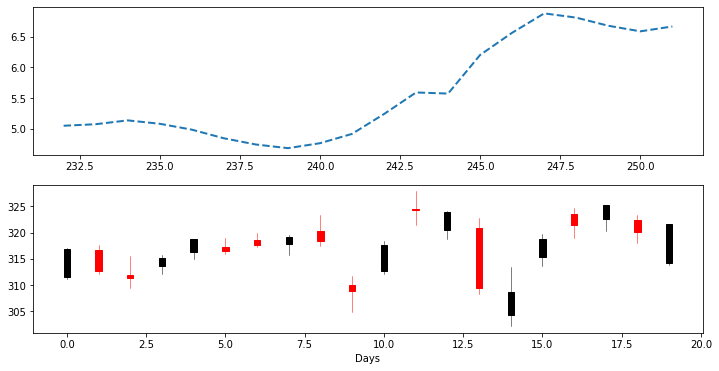

In [50]:
# Plot last 20 values

fig, ax = plt.subplots(2, figsize=(12,6))


t = np.arange(N - 1, num_days)
ax[0].plot(t[-20:], atr[-20:], '--', lw=2.0, label='ATR')

candlestick_ohlc(ax[1], zip(np.arange(len(high[-20:])),
                         open[-20:], high[-20:],
                         low[-20:], close[-20:]))

plt.xlabel('Days')
plt.show()

**Interpreting Moving Averages**

https://www.tradingview.com/wiki/Moving_Average

## Simple Moving Average (SMA)
 - For analyzing time-series data
 - Moving window of N periods
 - Mean of values inside the window
 - an unweighted moving average

In [51]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [52]:
# 5-Day Moving Average
N = 5

In [53]:
# First day of 5-day SMA
np.sum(x[0:N])/N

13.0

In [54]:
# Second day of 5-day SMA
np.sum(x[1:N+1])/N

14.0

In [55]:
# Third day of 5-day SMA
np.sum(x[2:N+2])/N

15.0

In [56]:
# Fourth day of 5-day SMA
np.sum(x[3:N+3])/N

16.0

In [57]:
# Using np.convolve

In [58]:
N = 5
weights = np.ones(N)/N
print("Weights", weights)

Weights [0.2 0.2 0.2 0.2 0.2]


In [59]:
np.convolve(x, weights)

array([ 2.2,  4.6,  7.2, 10. , 13. , 14. , 15. , 16. , 13.2, 10.2,  7. ,
        3.6])

In [60]:
np.convolve(x, weights)[N-1:-(N-1)]

array([13., 14., 15., 16.])

In [61]:
# Using the dataset

# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [62]:
len(close)

252

In [63]:
# 20-day moving window

N = 20

In [64]:
weights = np.ones(N)/N

In [65]:
sma = np.convolve(c, weights)[N-1:-(N-1)]
len(sma)

233

In [66]:
len(close[N-1:])

233

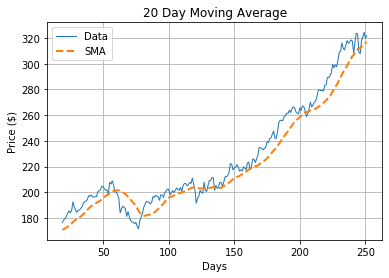

In [67]:
t = np.arange(N - 1, len(close))

plt.plot(t, close[N-1:], lw=1.0, label="Data")

plt.plot(t, sma, '--', lw=2.0, label="SMA")

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

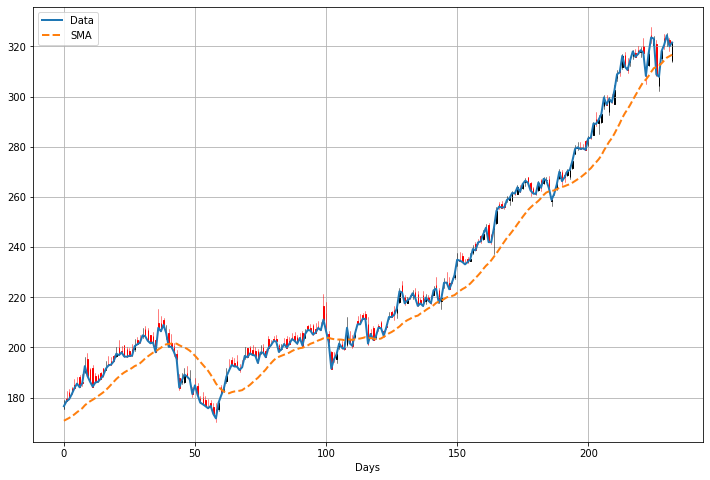

In [68]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()


## Weighted Moving Average (WMA)

In [69]:
x = np.array([5,6,7,8,9])
weights = np.array([5,4,3,2,1])
np.convolve(x, weights)/np.sum(weights)

array([1.66666667, 3.33333333, 4.93333333, 6.4       , 7.66666667,
       5.33333333, 3.33333333, 1.73333333, 0.6       ])

In [70]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [71]:
# 5-Day Moving Average
N = 5

In [72]:
weights = np.arange(1, N+1)
weights

array([1, 2, 3, 4, 5])

In [73]:
# First day of 5-day WMA
np.sum(x[0:N] * weights)/sum(weights)

13.666666666666666

In [74]:
# Second day of 5-day WMA
np.sum(x[1:N+1] * weights)/sum(weights)

14.666666666666666

In [75]:
# Third day of 5-day WMA
np.sum(x[2:N+2] * weights)/sum(weights)

15.666666666666666

In [76]:
# Fourth day of 5-day WMA
np.sum(x[3:N+3] * weights)/sum(weights)

16.666666666666668

In [77]:
# Same as

(np.convolve(x, weights[::-1])[N-1:-(N-1)])/sum(weights)

array([13.66666667, 14.66666667, 15.66666667, 16.66666667])

In [78]:
# Using the dataset

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [79]:
# 20-day moving window

N = 20

In [80]:
weights = np.arange(1, N+1)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [81]:
wma = (np.convolve(c, weights[::-1])[N-1:-(N-1)])/sum(weights)
wma[:5]

array([171.81071429, 172.55180952, 173.31419048, 174.21619048,
       175.2792381 ])

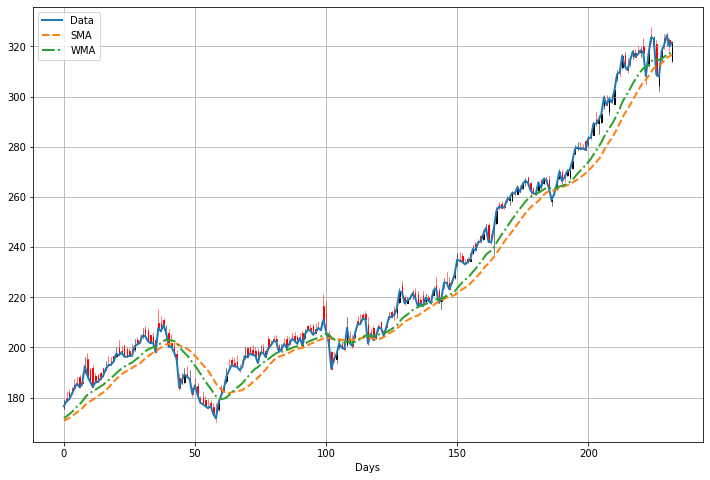

In [82]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")

plt.plot(t1, wma, '-.', lw=2.0, label="WMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()


## Exponential Moving Average (EMA)
 - For analyzing time-series data
 - Alternative to SMA
 - Moving window of N periods
 - Uses exponentially decreasing weights
 - Gives higher weights to recent prices
 

In [83]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [84]:
N = 5
weights = np.exp(np.linspace(0, 1, N))
weights

array([1.        , 1.28402542, 1.64872127, 2.11700002, 2.71828183])

In [85]:
# Normalize weights
weights /= weights.sum()
print("Weights", weights)

Weights [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


In [86]:
np.convolve(x, weights[::-1])[N-1:-(N-1)]

array([13.48694393, 14.48694393, 15.48694393, 16.48694393])

In [87]:
# Using the dataset

# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [88]:
# 20-day moving window

N = 20

In [89]:
weights = np.exp(np.linspace(0, 1, N))

# Normalize weights
weights /= weights.sum()

In [90]:
ema = np.convolve(c, weights[::-1])[N-1:-(N-1)]
len(ema)

233

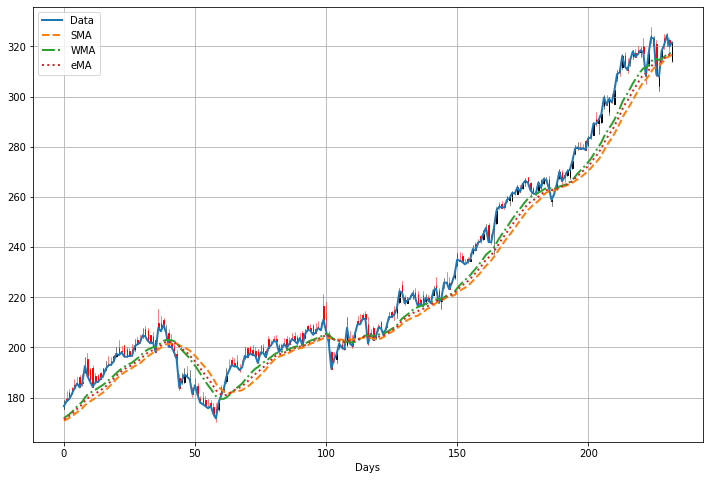

In [91]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")

plt.plot(t1, wma, '-.', lw=2.0, label="WMA")

plt.plot(t1, ema, ':', lw=2.0, label="eMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()